In [1]:
%matplotlib inline

import os
import requests
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv
import sys

from pandas.tools.plotting import scatter_matrix

from sklearn import cross_validation as cv
from sklearn.cross_validation import train_test_split as tts
from sklearn.linear_model import Ridge
from sklearn.linear_model import RandomizedLasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.cross_validation import cross_val_predict
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import cross_val_score
from sklearn.pipeline import FeatureUnion
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import IsolationForest


C:\Users\mjsteele\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv('D:\\yelp\\data\\Final_Regression_Data\\Final\\the_final_countdown-1\\the_final_countdown.csv')

In [3]:
data.head()

,_id,restaurant_name,address_full,business_id,review_count,inspection_date,stars,latitude,longitude,violations,...,LasVegas,neighborhood0,neighborhood1,neighborhood2,neighborhood3,neighborhood4,neighborhood5,neighborhood6,PreviousViolations,DiffPreviousTwo
0,ObjectId(5830680bf3f071f6de30b1d0),GRASSHOPPER VEGETARIAN,1 N Beacon ST Allston 02134,MiOurH3MHs6CwA6iOWehOQ,424,8/4/2008,4.0,42.35377,-71.137418,8,...,0,0,0,0,0,0,0,0,0,0
1,ObjectId(5830680bf3f071f6de30b1d0),GRASSHOPPER VEGETARIAN,1 N Beacon ST Allston 02134,MiOurH3MHs6CwA6iOWehOQ,424,8/18/2008,4.0,42.35377,-71.137418,8,...,0,0,0,0,0,0,0,0,8,0
2,ObjectId(5830680bf3f071f6de30b1d0),GRASSHOPPER VEGETARIAN,1 N Beacon ST Allston 02134,MiOurH3MHs6CwA6iOWehOQ,424,7/13/2009,4.0,42.35377,-71.137418,4,...,0,0,0,0,0,0,0,0,8,0
3,ObjectId(5830680bf3f071f6de30b1d0),GRASSHOPPER VEGETARIAN,1 N Beacon ST Allston 02134,MiOurH3MHs6CwA6iOWehOQ,424,7/27/2009,4.0,42.35377,-71.137418,4,...,0,0,0,0,0,0,0,0,4,0
4,ObjectId(5830680bf3f071f6de30b1d0),GRASSHOPPER VEGETARIAN,1 N Beacon ST Allston 02134,MiOurH3MHs6CwA6iOWehOQ,424,6/3/2010,4.0,42.35377,-71.137418,12,...,0,0,0,0,0,0,0,0,4,0


In [4]:
data.shape

(34991, 68)

In [5]:
data.describe()

,review_count,stars,latitude,longitude,violations,ChangeInViolations,IsAsian,IsFrench,IsSandwiches,IsFastFood,...,LasVegas,neighborhood0,neighborhood1,neighborhood2,neighborhood3,neighborhood4,neighborhood5,neighborhood6,PreviousViolations,DiffPreviousTwo
count,34991.000000,34991.000000,34991.000000,34991.000000,34991.000000,34991.000000,34991.000000,34991.000000,34991.000000,34991.000000,...,34991.000000,34991.0,34991.000000,34991.000000,34991.000000,34991.000000,34991.000000,34991.000000,34991.000000,34991.000000
mean,121.214227,3.601626,39.289480,-85.464582,6.934669,1.555171,0.192650,0.008459,0.113629,0.050699,...,0.290389,0.0,0.581807,0.521363,0.663371,0.551399,0.350804,0.443228,6.326484,-0.045297
std,178.588309,0.700143,3.355512,19.216630,8.340175,5.429591,0.394386,0.091586,0.317365,0.219385,...,0.453948,0.0,0.493269,0.499551,0.472564,0.497358,0.477229,0.496774,8.282943,3.511681
min,3.000000,1.000000,33.000000,-115.000000,0.000000,-42.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-98.000000
25%,21.000000,3.000000,36.000000,-115.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,60.000000,4.000000,42.292474,-71.137565,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000
75%,148.000000,4.000000,42.349124,-71.068237,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,0.000000
max,1922.000000,5.000000,42.389913,-70.996696,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,100.000000


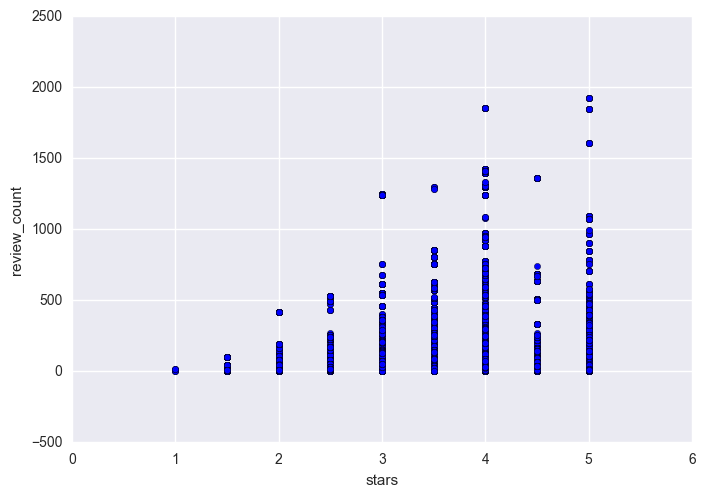

In [3]:
x = data['stars']
y = data['review_count']
plt.ylabel('review_count')
plt.xlabel('stars')
plt.scatter(x,y)

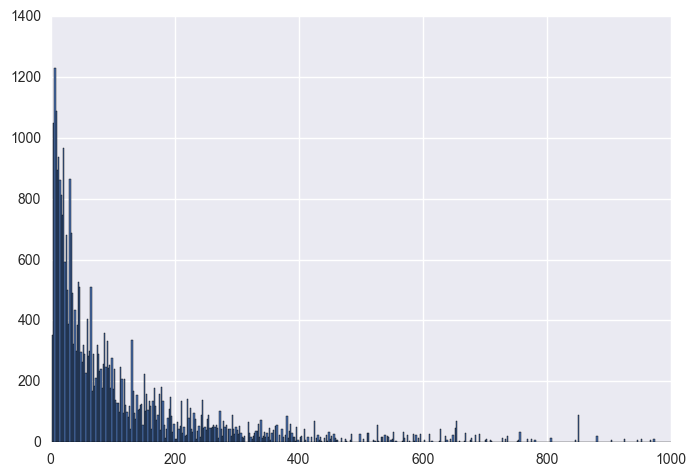

In [4]:
x = data['review_count']
x.xlabel= ('review_count')
x.hist(bins=500, range = [0, 1000])

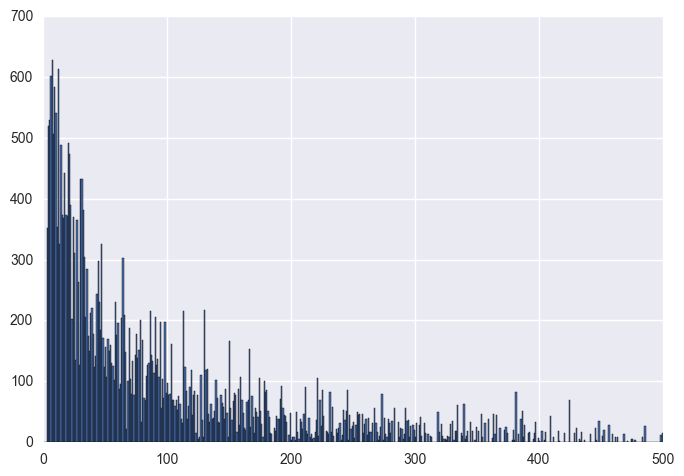

In [6]:
x = data['review_count']
x.xlabel= ('review_count')
x.hist(bins=500, range = [0, 500])

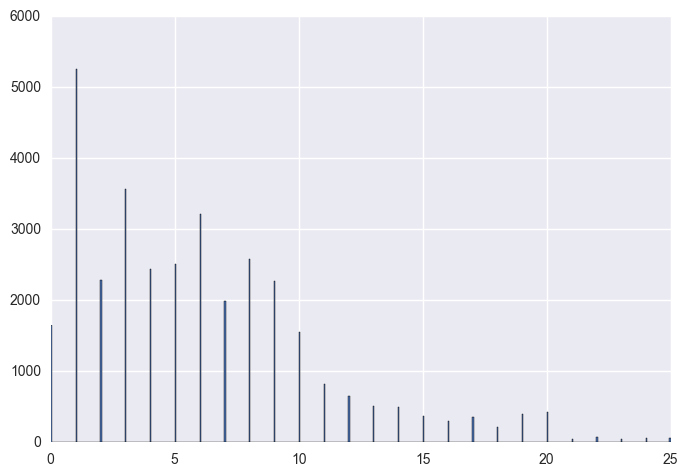

In [7]:
x = data['violations']
plt.xlabel= ('violations')
x.hist(bins=500, range = [0, 25])

(0, 25)

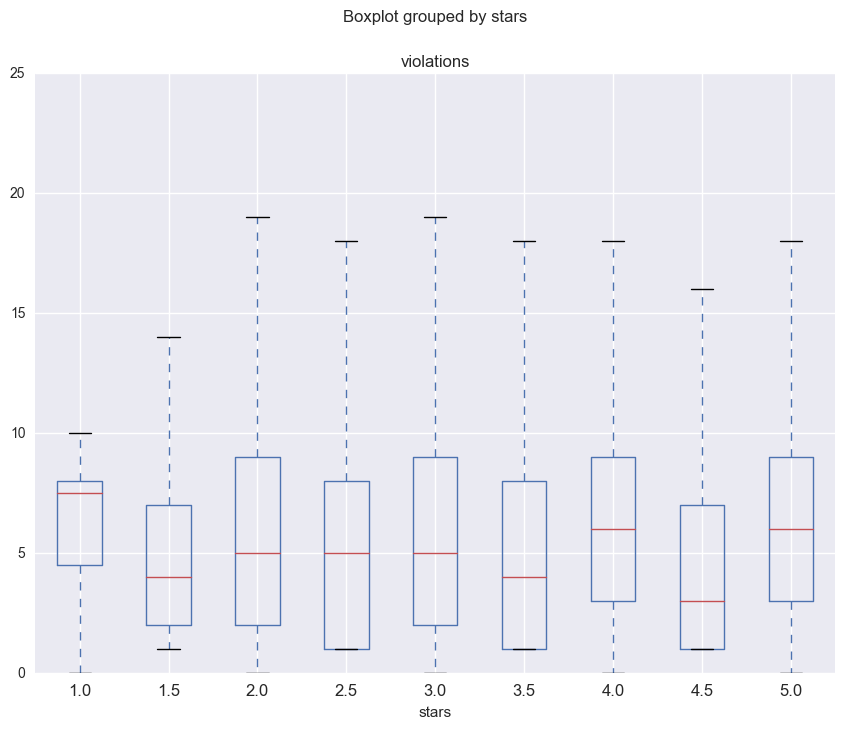

In [8]:
data.boxplot('violations', by='stars', figsize =(10,8))
plt.ylabel=('violations')
plt.ylim(0,25)

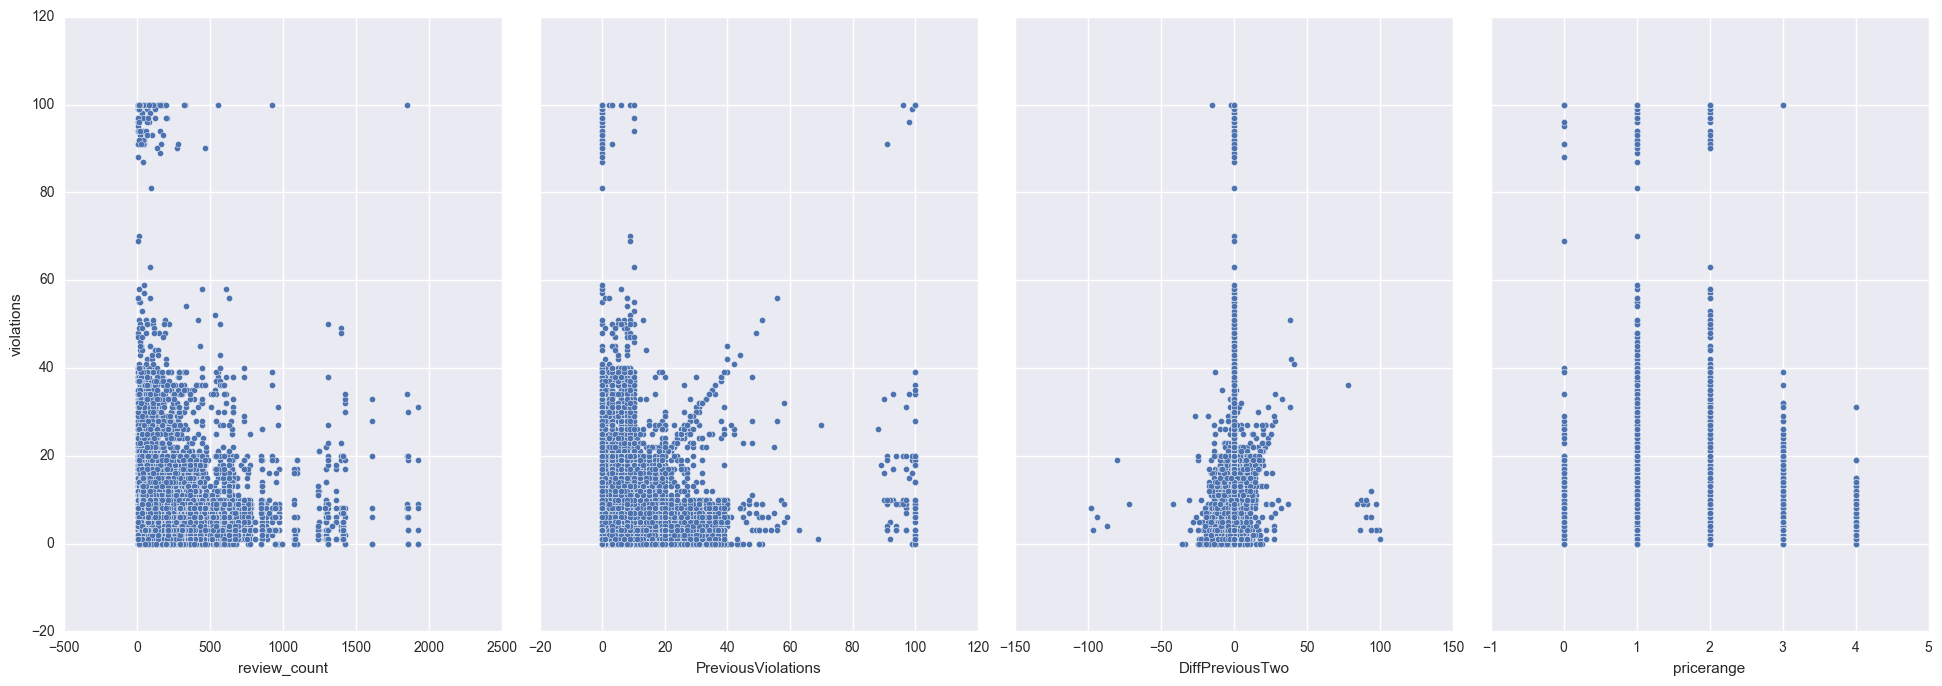

In [9]:
sns.pairplot(data, x_vars=['review_count','PreviousViolations', 'DiffPreviousTwo', 'pricerange'], y_vars='violations', size=7, aspect=0.7)

In [3]:
#scaling continuous independent variables, with mean zero
sdf = data.copy()
scaled = np.array(sdf[['review_count', 'stars', 'pricerange', 'PreviousViolations', 'DiffPreviousTwo']])
scaled = preprocessing.scale(scaled)
# scaled.shape
final = pd.DataFrame(data = scaled,
                     columns =['review_count', 'stars', 'pricerange', 'PreviousViolations', 'DiffPreviousTwo'])

delist = ['review_count', 'stars', 'pricerange', 'PreviousViolations', 'DiffPreviousTwo']
ndf = data.copy()
for i in delist:
    del ndf[i]
# ndf.shape
df = pd.concat([final, ndf], axis=1)

df.shape

(34991, 68)

In [11]:
#scaling continuos independent variables using feature range
fdf = data.copy()
X_train = np.array(fdf[['review_count', 'stars', 'pricerange', 'PreviousViolations', 'DiffPreviousTwo']])
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax
f_final = pd.DataFrame(data = X_train_minmax,
                     columns =['review_count', 'stars', 'pricerange', 'PreviousViolations', 'DiffPreviousTwo'])

delist = ['review_count', 'stars', 'pricerange', 'PreviousViolations', 'DiffPreviousTwo']
f_df = data.copy()
for i in delist:
    del f_df[i]
f_df.shape

df2 = pd.concat([f_df, f_final], axis=1)

df2.shape

(34991, 68)

In [238]:
df2

,_id,restaurant_name,address_full,business_id,inspection_date,latitude,longitude,violations,ChangeInViolations,IsAsian,...,neighborhood2,neighborhood3,neighborhood4,neighborhood5,neighborhood6,review_count,stars,pricerange,PreviousViolations,DiffPreviousTwo
0,ObjectId(5830680bf3f071f6de30b1d0),GRASSHOPPER VEGETARIAN,1 N Beacon ST Allston 02134,MiOurH3MHs6CwA6iOWehOQ,8/4/2008,42.353770,-71.137418,8,0,1,...,0,0,0,0,0,0.219385,0.750,0.50,0.00,0.494949
1,ObjectId(5830680bf3f071f6de30b1d0),GRASSHOPPER VEGETARIAN,1 N Beacon ST Allston 02134,MiOurH3MHs6CwA6iOWehOQ,8/18/2008,42.353770,-71.137418,8,0,1,...,0,0,0,0,0,0.219385,0.750,0.50,0.08,0.494949
2,ObjectId(5830680bf3f071f6de30b1d0),GRASSHOPPER VEGETARIAN,1 N Beacon ST Allston 02134,MiOurH3MHs6CwA6iOWehOQ,7/13/2009,42.353770,-71.137418,4,0,1,...,0,0,0,0,0,0.219385,0.750,0.50,0.08,0.494949
3,ObjectId(5830680bf3f071f6de30b1d0),GRASSHOPPER VEGETARIAN,1 N Beacon ST Allston 02134,MiOurH3MHs6CwA6iOWehOQ,7/27/2009,42.353770,-71.137418,4,0,1,...,0,0,0,0,0,0.219385,0.750,0.50,0.04,0.494949
4,ObjectId(5830680bf3f071f6de30b1d0),GRASSHOPPER VEGETARIAN,1 N Beacon ST Allston 02134,MiOurH3MHs6CwA6iOWehOQ,6/3/2010,42.353770,-71.137418,12,8,1,...,0,0,0,0,0,0.219385,0.750,0.50,0.04,0.494949
5,ObjectId(5830680bf3f071f6de30b1d0),GRASSHOPPER VEGETARIAN,1 N Beacon ST Allston 02134,MiOurH3MHs6CwA6iOWehOQ,6/4/2010,42.353770,-71.137418,12,0,1,...,0,0,0,0,0,0.219385,0.750,0.50,0.12,0.494949
6,ObjectId(5830680bf3f071f6de30b1d0),GRASSHOPPER VEGETARIAN,1 N Beacon ST Allston 02134,MiOurH3MHs6CwA6iOWehOQ,3/8/2011,42.353770,-71.137418,1,0,1,...,0,0,0,0,0,0.219385,0.750,0.50,0.12,0.494949
7,ObjectId(5830680bf3f071f6de30b1d0),GRASSHOPPER VEGETARIAN,1 N Beacon ST Allston 02134,MiOurH3MHs6CwA6iOWehOQ,6/16/2011,42.353770,-71.137418,4,3,1,...,0,0,0,0,0,0.219385,0.750,0.50,0.01,0.494949
8,ObjectId(5830680bf3f071f6de30b1d0),GRASSHOPPER VEGETARIAN,1 N Beacon ST Allston 02134,MiOurH3MHs6CwA6iOWehOQ,10/6/2011,42.353770,-71.137418,4,0,1,...,0,0,0,0,0,0.219385,0.750,0.50,0.04,0.494949
9,ObjectId(5830680bf3f071f6de30b1d0),GRASSHOPPER VEGETARIAN,1 N Beacon ST Allston 02134,MiOurH3MHs6CwA6iOWehOQ,10/28/2011,42.353770,-71.137418,4,0,1,...,0,0,0,0,0,0.219385,0.750,0.50,0.04,0.494949


In [13]:
# idf = data.copy()
# #Normalization (scaling individual samples to have unit norm)
# X_normalized = np.array(idf[['review_count', 'stars', 'pricerange', 'PreviousViolations', 'DiffPreviousTwo']])
# X_normalized = preprocessing.normalize(X, norm='l2')
# X_normalized

In [12]:
variables = df2[['review_count', 'stars', 'IsAsian', 'Pizza', 'Boston', 'IsItalian', 'IsSeafood', 'LasVegas',
                'Charlotte', 'pricerange', 'upscale', 'divey', 'alcohol', 'neighborhood1', 
                'neighborhood2', 'neighborhood3', 'neighborhood4', 'neighborhood5', 'neighborhood6']]

# variables = df[['violations','PreviousViolations','DiffPreviousTwo','ChangeInViolations','IsAsian','IsFrench','IsSandwiches',
#                  'IsFastFood','IsBurgers','IsItalian','IsHawaiian','IsSouthern','IsMexican','IsLatinAmerican','IsMiddleEastern',
#                  'IsGreek','IsAmerican','IsDonuts','IsIndian','IsSeafood','IsDesserts','IsSalad','Pizza','IsBuffets',
#                  'IsSushiBars','IsDelis','IsSports Bars','IsBakeries','IsPubs','IsCaterers','IsDiners','IsCafes','IsBars',
#                  'alcohol','delivery','dogsallowed','smoking','goodforkids','outdoorseating','waiterservice','creditcards',
#                  'pricerange','drivethru','tourist','classy','hipster','latenight','upscale','divey','Boston','Charlotte',
#                  'LasVegas','neighborhood0','neighborhood1','neighborhood2','neighborhood3','neighborhood4','neighborhood5','neighborhood6']]
target = df2['violations']
variables.shape
target.shape

(34991,)

In [13]:
splits = cv.train_test_split(variables, target, test_size=0.83)
X_train, X_test, y_train, y_test = splits

Ridge Regression model
Mean Squared Error: 65.115
Coefficient of Determination: 0.068


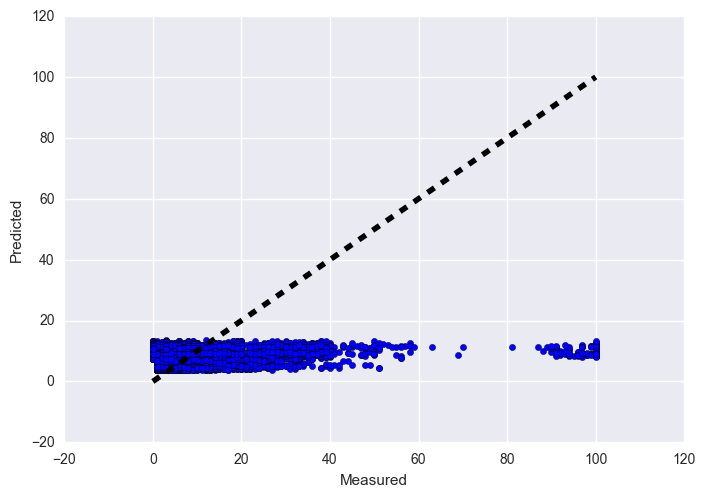

In [14]:
model = Ridge(alpha=10.11)
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print("Ridge Regression model")
print("Mean Squared Error: %0.3f" % mse(expected, predicted))
print("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(model, variables, target, cv=10)

fig, ax = plt.subplots()
ax.scatter(target, predicted)
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [15]:
# n_alphas = 200
# alphas = np.logspace(-200, 200, n_alphas)

# model = linear_model.RidgeCV(alphas=alphas)
# model.fit(X_train, y_train)

# #which alpha did it pick?
# print (model.alpha_)

In [16]:
# # plot our alphas
# linear_model.Ridge(fit_intercept=False)
# errors = []

In [17]:
# for alpha in alphas:
#     splits = tts(variables, target, test_size=0.2)
#     X_train, X_test, y_train, y_test = splits
#     model.set_params(alpha=alpha)
#     model.fit(X_train, y_train)
#     error = mse(y_test, model.predict(X_test))
#     errors.append(error)

In [18]:
# axe = plt.gca()
# axe.plot(alphas, errors)
# plt.show()

Linear Regression model
Mean Squared Error: 65.125
Coefficient of Determination: 0.068


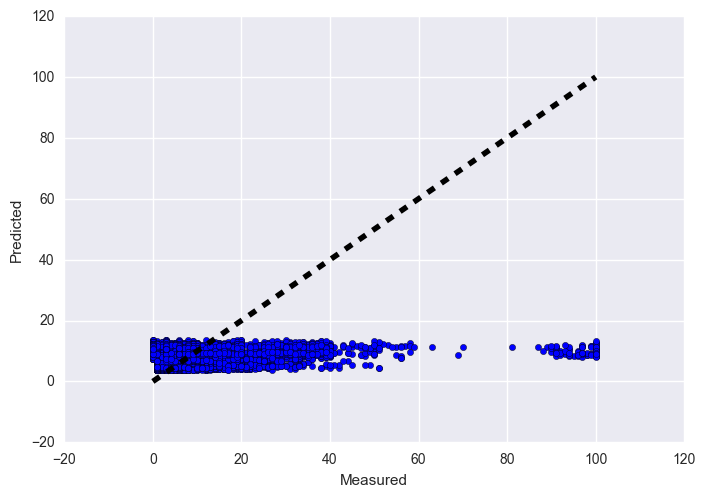

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print("Linear Regression model")
print("Mean Squared Error: %0.3f" % mse(expected, predicted))
print("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(model, variables, target, cv=10)

fig, ax = plt.subplots()
ax.scatter(target, predicted)
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Random Forest model
Mean squared error = 62.719
R2 score = 0.097


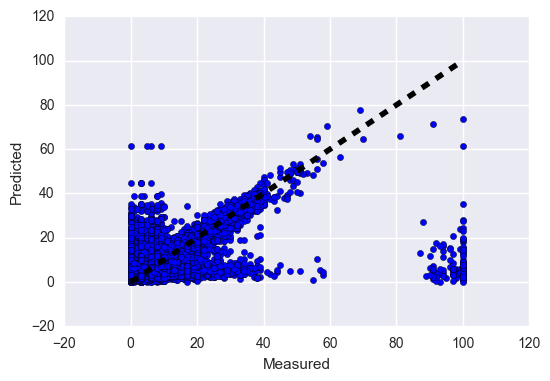

In [258]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print("Random Forest model")
print("Mean squared error = %0.3f" % mse(expected, predicted))
print("R2 score = %0.3f" % r2_score(expected, predicted))

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(model, variables, target, cv=10)

fig, ax = plt.subplots()
ax.scatter(target, predicted)
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Mean Squared Error: 49.262
Coefficient of Determination: 0.291


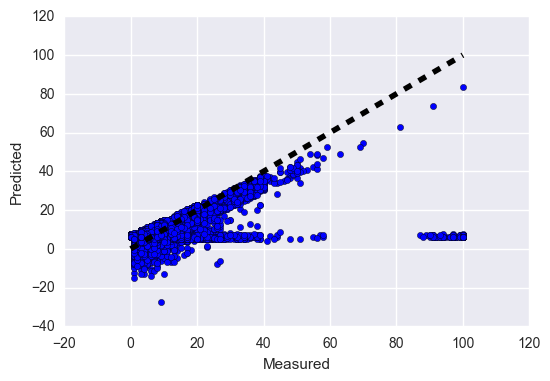

In [259]:
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

expected  = y_test
predicted = model.predict(X_test)

# Evaluate fit of the model
print("Mean Squared Error: %0.3f" % mse(expected, predicted))
print("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(model, variables, target, cv=10)

fig, ax = plt.subplots()
ax.scatter(target, predicted)
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [20]:
X, y = variables, target
X.shape
kbest = SelectKBest(chi2, k=10).fit_transform(X,y)
#np.asarray(kbest.get_feature_names())[chi2.get_support()]
best = pd.DataFrame(kbest)

In [276]:
kbest

array([[ 1.,  0.,  1., ...,  0.,  0.,  0.],
       [ 1.,  0.,  1., ...,  0.,  0.,  0.],
       [ 1.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.]])

In [278]:
best.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
#Lay some pipe
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

Polynomial = PolynomialFeatures(2)
PCA = PCA()
kbest = SelectKBest()
IsolationForest = IsolationForest()
LinearRegression = linear_model.LinearRegression()
Ridge = linear_model.Ridge()
Lasso = linear_model.Lasso()
RandomForest = RandomForestRegressor()



pipeline = Pipeline([
        ('features', FeatureUnion([
                    ('Polynomial Features', Polynomial),
                    ('Feature Selection', PCA),
                    ('kbest', kbest)])),
        ('estimators', FeatureUnion([
                    ('Ridge Regression', Ridge),
                    ('Lasso Regression', Lasso),
                    ('Random Forest Regression', RandomForest)])
                )])
        
pipeline.fit(data, target)
        
        
        
        
        
        
        
        
        
        
        
    

TypeError: All estimators should implement fit and transform. 'Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)' (type <class 'sklearn.linear_model.ridge.Ridge'>) doesn't

In [30]:
x = np.array(variables)
y = np.array(target)

models = ['LinearRegression()', 'Ridge()', 'Lasso()', 'RandomForestRegressor()']
degrees = [2, 3, 4, 5]
for i in range(len(degrees)):
    for model in models:

    
        polynomial = PolynomialFeatures(degree = degrees[i]) 

        pipeline = Pipeline([("polynomial features", polynomial), ("model", model)])

        pipeline.fit(x,y)
        scores = cross_val_score(pipeline, x, y,
                                 scoring="mean_squared_error", cv=10)
        X_test = np.linspace(0, 1, 100)
        plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
        plt.scatter(x, y, label="Samples")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim((0, 1))
        plt.ylim((-2, 2))
        plt.legend(loc="best")
        plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()))
    plt.show()


TypeError: Last step of chain should implement fit 'LinearRegression()' (type <class 'str'>) doesn't)